In [1]:
from google.colab import files


uploaded = files.upload()



Saving iris_data.csv to iris_data.csv


First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  Species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Pairplot of the dataset:


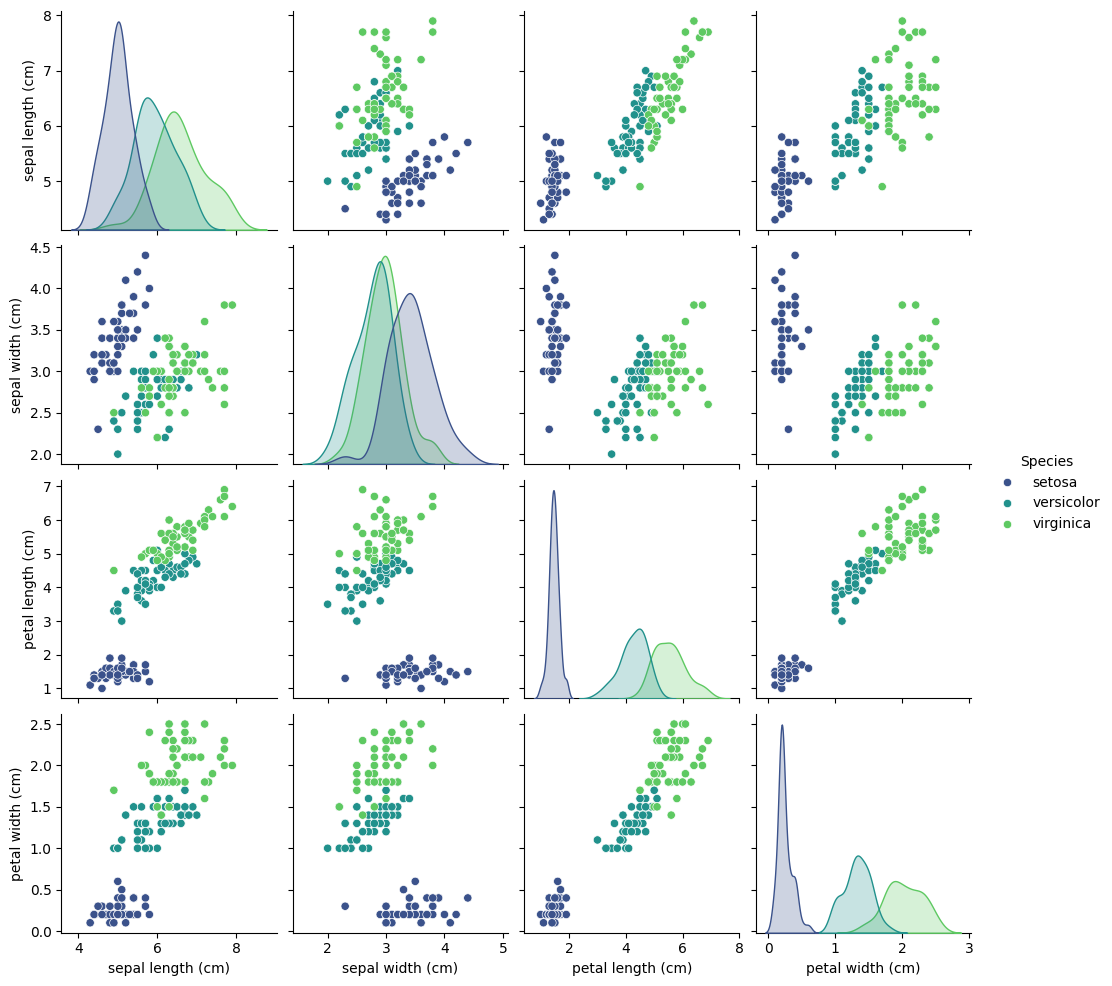


Model Accuracy: 100.00%

Confusion Matrix:


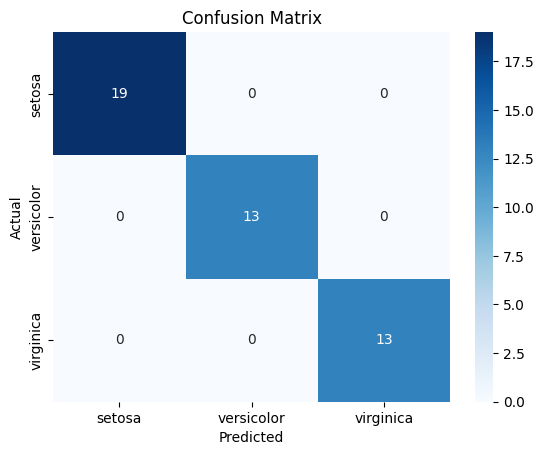


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Feature Importance:


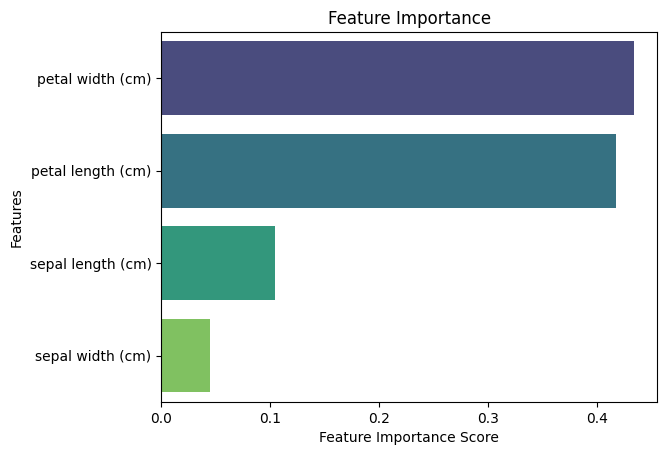


Predicted Species for the new flower: versicolor


In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the full Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Species'] = iris.target_names[iris.target]

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Pairplot to visualize relationships between features
print("\nPairplot of the dataset:")
sns.pairplot(df, hue='Species', palette='viridis')
plt.show()

# Separate features (X) and target (y)
X = df.drop('Species', axis=1)  # Features
y = df['Species']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'\nModel Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix to evaluate model performance
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance
print("\nFeature Importance:")
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
sns.barplot(x=feature_importance, y=feature_importance.index, hue=feature_importance.index, palette='viridis', legend=False)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

# Example of making a prediction on a new data point
new_flower = [[7.0, 3.2, 4.7, 1.4]]  # SepalLength, SepalWidth, PetalLength, PetalWidth

# Convert the new data point to a DataFrame with feature names
new_flower_df = pd.DataFrame(new_flower, columns=X.columns)

# Make the prediction
predicted_species = model.predict(new_flower_df)
print(f'\nPredicted Species for the new flower: {predicted_species[0]}')

# New Section